# Assignment 6 - Principle Component Analysis
Grayson Hineline

Cameron Kaminski

Note for portfolio: In this project me and my partner explored using Principle Component Analysis to help us visualize the learned feature extraction process of a machine learning model. Sorry for the abundant amount of stuff from the professor that just makes this look like homework, but the work towards the middle of this notebook is worth seeing.

## Background (From the Professor)

In class, we talked about how machine learning techniques require vectors, and you must first perform **feature extraction** to create **feature vectors** if your data is not already in vector form. I mentioned that this is considered outside the domain of machine learning, but that's not entirely true, especially in recent years. In fact, most modern ML techniques that work on data that's not naturally represented as vectors (e.g., text, images, audio) begin with a very simple vector representation of the raw signal, then **learn** how to extract good features from them.

For example, in computer vision we used to start by detecting corners, edges, or other low-level visual features in images, then shoehorn those into vectors, which we would then use machine learning to classify. Nowadays, we typically flatten the image into a vector (pretty much just `np.flatten`) and use models that learn how to go from raw pixels to the answers we want.

An early example of such a model is called LeNet, and it was designed to work on the handwritten digit recognition problem that we briefly touched on in class. This model works in **layers**, where each layer transforms the image into a new set of features, until finally the last layer spits out a classification; in our case, it's trying to decide which of `range(10)` a handwritten digit represents. Here's a diagram of LeNet- the details aren't important, so don't worry about the specifics - but notice that the model is drawn in layers: ![](lenet5.png)

When trained well, the practical effect of models like this (these are called "convolutional neural networks", by the way) is that **the features become more and more "well-organized" after each layer**. Unfortunately, each intermediate feature representation is high-dimensional, so we can't directly see this. One of the uses we discussed in class for PCA is for visualizing high-dimensional things. In this lab, we're going to put this to use to visualize the the features at each step and see if we observe a trend towards a more orderly set of features.

Let's get some useful imports out of the way - if you need more libraries, import them here:

In [1]:
import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

## The Data (From the professor)

For our purposes, the code for the LeNet model can be abstracted to something like this:

```python
inputs = load_digits()
conv1_features = conv1(inputs)
conv2_features = conv2(conv1_features)
fc1_features = fc1(conv2_features)
fc2_features = fc2(fc1_features)
fc3_features = fc3(fc2_features)
```

The specifics of the functions aren't important to us right now. Notice that each function simply takes the output of the prior one, and transforms it in some way to produce the next set of features.

Let's load up two files that give us access to those variables above, as well as the ground-truth digit labels, for 5400 example digits:

In [2]:
# adapted from https://stackoverflow.com/a/61716809
def np_load_from_url(url):
    response = requests.get(url)
    response.raise_for_status() # throw an error if it didn't work
    return np.load(io.BytesIO(response.content))

In [3]:
base_url = "https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_21f/data/mnist/"
labels = np_load_from_url(base_url + "labels.npz")["labels"]
features = dict(np_load_from_url(base_url + "features.npz"))

In [4]:
print(labels.shape, labels[:10])

(5400,) [1 5 6 5 2 0 0 8 1 7]


We can see that there are 5400 labels, and each one says what digit a given example actually represents.

In [5]:
print(features.keys())

dict_keys(['input', 'conv1', 'conv2', 'fc1', 'fc2', 'fc3'])


The `features` dict contains values for each of the variables described in the pseudocode above. The `input` just contains the input images, flattened into vectors:

In [6]:
features["input"].shape

(5400, 784)

Notice this is, as per tradition, an $n \times d$ matrix - each of 5400 images have 784 pixels (originally, they were 28x28). We can visualize a few images to see what they look like:

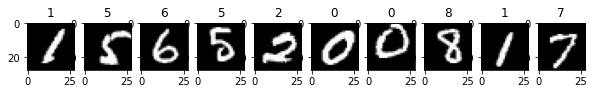

In [7]:
fig = plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(1,10,i+1)
    in_image = features["input"][i].reshape((28, 28))
    plt.imshow(in_image, cmap="gray")
    plt.title(str(labels[i]))

Notice the labels (above each image) line up with the labels we saw above.

The remaining features don't have such a nice visualizeable interpretation - we're stuck just thinking of them as high-dimensional vectors. Let's see their dimensionality:

In [8]:
pd.DataFrame({"Feature set" : features.keys(),
              "Shape": [f.shape for f in features.values()]})

,Feature set,Shape
0,input,"(5400, 784)"
1,conv1,"(5400, 3456)"
2,conv2,"(5400, 1024)"
3,fc1,"(5400, 120)"
4,fc2,"(5400, 84)"
5,fc3,"(5400, 10)"


In [9]:
labels

array([1, 5, 6, ..., 7, 6, 3], dtype=int64)

## Your Tasks (From the professor)

#### Part 1: Visualizing the Feature Spaces

**1.1**: Your first (and primary) job in part 1 is to take each of these collections of feature vectors (I'll call them "feature sets" from here on out), use PCA to reduce their dimensionality to two, transform the features into their 2D representation, and visualize them in a scatterplot; color-code the points in the scatterplot by the ground-truth label (stored in `labels`).

##### PCA Refresher
Recall that you can compute PCA using `scikit-learn` by instantiating a `PCA` object, passing it the number of components you want to fit:
```python
pca = PCA(n_components=d_prime)
```
then calling its `fit` method on the $n \times d$ data matrix:
```python
pca.fit(X)
```

This computes the `d_prime` component vectors that point in the directions of greatest variance, accessible via `pca.components_`. To actually reduce the dimensionality of the data, you can convert your data matrix into a new `d_prime`-dimensional data matrix (which lives in the space spanned by the `d_prime` component vectors). In `sklearn`, you can accomplish this using the PCA object's `transform` method:
```python
Xprime = pca.transform(X)
```
where `Xprime.shape` would now be `(n, d_prime)`. You can access the fraction of variance explained by each component using `pca.explained_variance_ratio_`.

# This point on is me and my partner's code:

In [10]:
# TODO 1.1 - your code here

features_rd2 = features.copy() #copying the features such that the original are not overwritten

pca = PCA(n_components=2)

for value in features_rd2:
    x = features_rd2[value]
    pca.fit(x)
    Xprime = pca.transform(x)
    features_rd2[value] = Xprime # replacing the values in features with their transformed 2x540 arrays

In [11]:
features_rd2

{'input': array([[-9.113778  ,  4.982716  ],
        [-0.32665956, -3.69342   ],
        [ 5.636075  ,  1.6118221 ],
        ...,
        [ 3.8300147 , -7.788062  ],
        [-0.8435726 ,  3.1556244 ],
        [-2.176828  , -1.0025767 ]], dtype=float32),
 'conv1': array([[-15.444725 , -20.76254  ],
        [  2.2395973,  11.831584 ],
        [ 21.055439 , -11.774013 ],
        ...,
        [  2.2102907,  43.92955  ],
        [-18.181952 , -29.539217 ],
        [-14.481486 ,   1.645314 ]], dtype=float32),
 'conv2': array([[-24.387974  , -27.034288  ],
        [ 16.167477  ,  -9.428549  ],
        [-37.385742  ,   2.7492561 ],
        ...,
        [ 83.00481   ,  39.23688   ],
        [-31.696451  ,  -0.43492723],
        [-14.904126  , -21.350517  ]], dtype=float32),
 'fc1': array([[-52.16414  ,   9.737863 ],
        [ 18.783253 ,  -8.267338 ],
        [ 20.831718 ,  18.89138  ],
        ...,
        [ 31.040047 , -29.877636 ],
        [  6.1644297,   1.6335905],
        [ 23.941023 , -

In [12]:
features_rd2['input'].shape

(5400, 2)

Now that we have converted the feature sets to two dimensions, we can now plot them.

In [13]:
sns.set(rc = {'figure.figsize':(10,10)})

<AxesSubplot:>

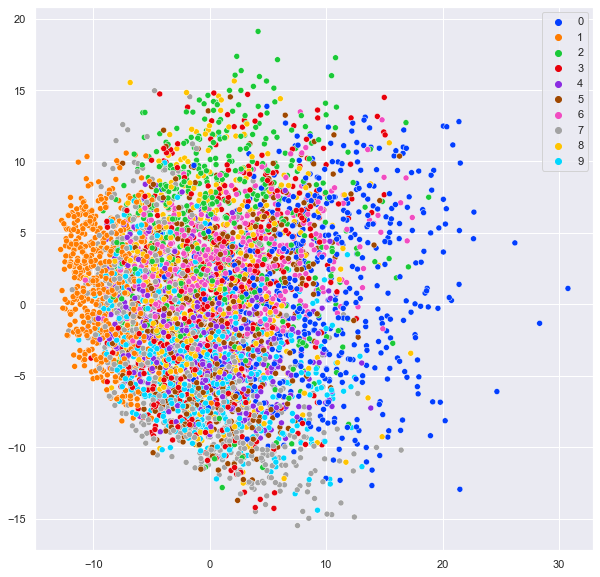

In [14]:
# plotting 'input'
sns.scatterplot(data = features_rd2, x = features_rd2['input'][:, 0], y = features_rd2['input'][:, 1], hue = labels, palette="bright")

<AxesSubplot:>

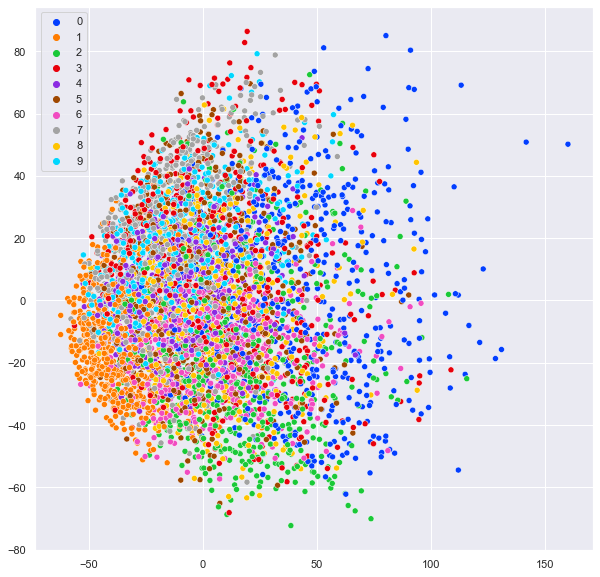

In [15]:
# plotting 'conv1'
sns.scatterplot(data = features_rd2, x = features_rd2['conv1'][:, 0], y = features_rd2['conv1'][:, 1], hue = labels, palette="bright")

<AxesSubplot:>

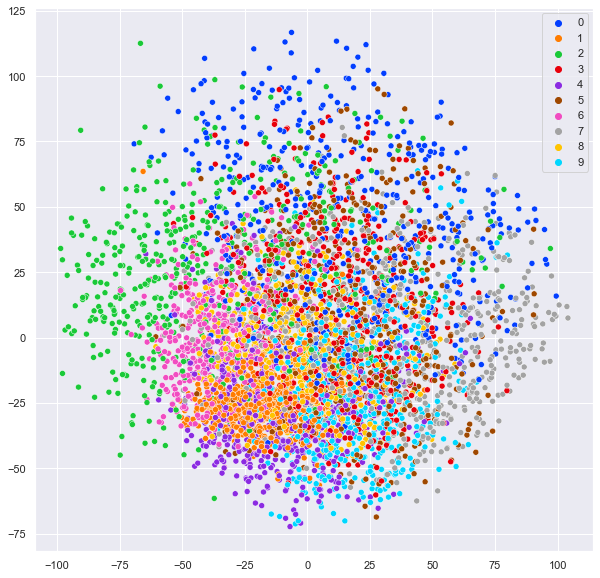

In [16]:
# plotting 'conv2'
sns.scatterplot(data = features_rd2, x = features_rd2['conv2'][:, 0], y = features_rd2['conv2'][:, 1], hue = labels, palette="bright")

<AxesSubplot:>

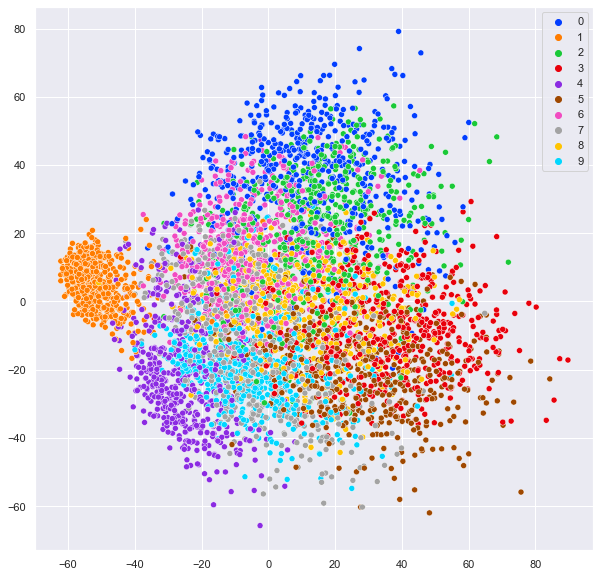

In [17]:
# plotting 'fc1'
sns.scatterplot(data = features_rd2, x = features_rd2['fc1'][:, 0], y = features_rd2['fc1'][:, 1], hue = labels, palette="bright")

<AxesSubplot:>

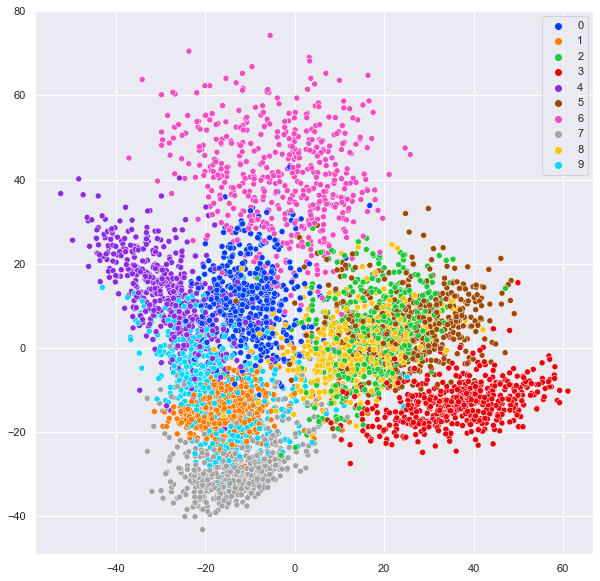

In [18]:
# plotting 'fc2'
sns.scatterplot(data = features_rd2, x = features_rd2['fc2'][:, 0], y = features_rd2['fc2'][:, 1], hue = labels, palette="bright")

<AxesSubplot:>

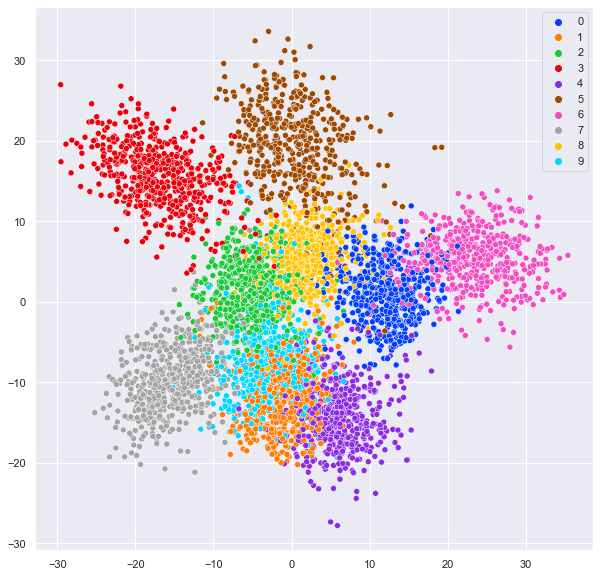

In [19]:
# plotting 'fc3'
sns.scatterplot(data = features_rd2, x = features_rd2['fc3'][:, 0], y = features_rd2['fc3'][:, 1], hue = labels, palette="bright")

**1.2** You'll notice that in the plot for the final feature set (`fc3`), there is still considerable overlap among points in different classses. Does this imply that if we run some kind of classification or clustering scheme on these feature vectors, we should expect it to be impossible to get very high accuracy? Why or why not?

**TODO 1.2** - Write your answer to part 1.2 here.

Yes, if you run clustering scheme it be unlikely that you get a high level of accuracy. This is because clustering algorithms work by discovering groups of data. However given our plot; there are multiple categories overlapping each other thus a clustering algorithm won't be able to discover a distinguishing group between them.

#### Part 2: Estimating Intrinsic Dimensionality

Above, we used PCA to visualize how "orderly" the feature space is as it goes through the model. Now, let's look at this in a slightly more quantitative way. We talked about **intrinsic dimensionality** as the minimum number of dimensions needed to represent a set of data. PCA also gives us a coarse way to estimate the intrinsic dimensionality by looking at the amount of variance explained by each component. For example, if the vast majority of the variance is explained by the first two components, the intrinsic dimensionality is probably around 2.

**2.1**: For each of the feature sets, compute up to 100 PCA components (for features with $d < 100$, compute all $d$ components) and make a plot to visualize the fraction of the variance explained by each of the first K components as a function of K (you may find the `np.cumsum` function helpful here).

**2.2**: Let's (arbitrarily) define our estimate of intrinsic dimensionality to be the number of components needed to explain at least 90% of the variance. For each feature set, what is its intrinsic dimensionality esimate based on this definitions? Show your results in a nicely formatted table and/or a sensibly designed plot.

**2.1**

We're going to compute 100 PCA components for each feature (given the feature has 100 components), then put the cumulative sum of each successive dimension for a given feature into a dataframe called `sum_df`.

In [20]:
features_rd100 = features.copy()

sum_df = pd.DataFrame()

for key, value in enumerate(features_rd100):
    x = features_rd100[value]
    x_1 = x.shape
    if x_1[1] < 100: #if d<100, compute all d components
        pca = PCA(n_components=x_1[1])
    else: #if d>100, compute 100 components
        pca = PCA(n_components=100)
    pca.fit(x)
    Xprime = pca.transform(x)
    features_rd100[value] = Xprime
    
    cs_array = np.cumsum(pca.explained_variance_ratio_)
    sum_df[key] = pd.Series(cs_array)
    
sum_df

,0,1,2,3,4,5
0,0.069335,0.095363,0.100065,0.203373,0.200038,0.285948
1,0.125805,0.163797,0.188243,0.332892,0.364015,0.546363
2,0.173462,0.224541,0.272581,0.443278,0.511345,0.671595
3,0.217492,0.279621,0.340136,0.524081,0.627595,0.773425
4,0.257256,0.330013,0.404506,0.595101,0.706512,0.873549
...,...,...,...,...,...,...
95,0.894524,0.963218,0.979620,0.999350,NaN,NaN
96,0.895702,0.963951,0.979991,0.999397,NaN,NaN
97,0.896839,0.964676,0.980352,0.999442,NaN,NaN
98,0.897969,0.965353,0.980707,0.999487,NaN,NaN


Renaming the columns to be the feature names and setting the index to indicate the number of dimensions each culmalitive sum of variance represents.

In [21]:
sum_df.index = sum_df.index + 1 #such that the index can indicate the number of dimensions
sum_df = sum_df.rename(columns ={0: 'input', 1: 'conv1', 2: 'conv2', 3: 'fc1', 4:'fc2', 5:'fc3'})
sum_df

,input,conv1,conv2,fc1,fc2,fc3
1,0.069335,0.095363,0.100065,0.203373,0.200038,0.285948
2,0.125805,0.163797,0.188243,0.332892,0.364015,0.546363
3,0.173462,0.224541,0.272581,0.443278,0.511345,0.671595
4,0.217492,0.279621,0.340136,0.524081,0.627595,0.773425
5,0.257256,0.330013,0.404506,0.595101,0.706512,0.873549
...,...,...,...,...,...,...
96,0.894524,0.963218,0.979620,0.999350,NaN,NaN
97,0.895702,0.963951,0.979991,0.999397,NaN,NaN
98,0.896839,0.964676,0.980352,0.999442,NaN,NaN
99,0.897969,0.965353,0.980707,0.999487,NaN,NaN


Now we can plot them.

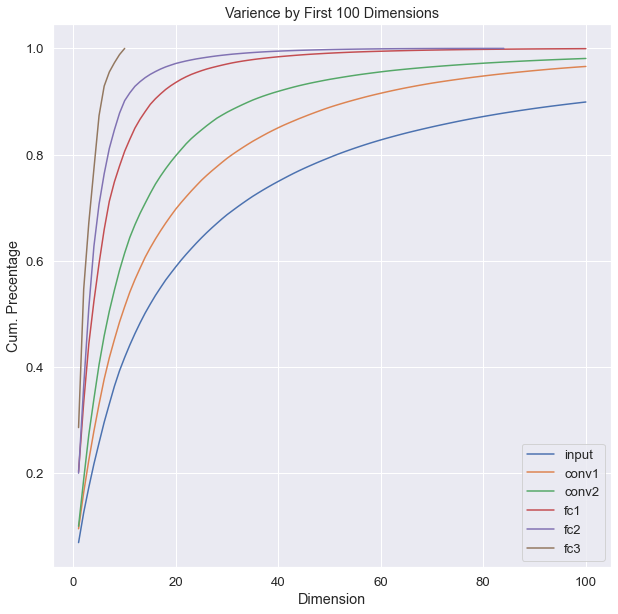

In [22]:
sns.set_theme(font_scale = 1.2)
plot = sns.lineplot(data = sum_df, dashes = False)

plot.set_ylabel("Cum. Precentage")
plot.set_xlabel("Dimension")
plot.set_title("Varience by First 100 Dimensions");

**2.2**

First we're going to make a similar dataframe as the 2.1, but instead we will set the number of PCA componets to 150 such that features that do not have at least 90% of the variance explained in the first 100 dimensions can be represented.

In [23]:
cum_df = pd.DataFrame()

features_rd150 = features.copy()

for key, value in enumerate(features_rd150):
    x = features_rd150[value]
    x_1 = x.shape
    if x_1[1] < 150:
        pca = PCA(n_components=x_1[1])
    else:
        pca = PCA(n_components=150)
    pca.fit(x)
    Xprime = pca.transform(x)
    features_rd150[value] = Xprime
    cs_array = np.cumsum(pca.explained_variance_ratio_)
    cum_df[key] = pd.Series(cs_array)

In [24]:
cum_df = cum_df.rename(columns ={0: 'input', 1: 'conv1', 2: 'conv2', 3: 'fc1', 4:'fc2', 5:'fc3'})
cum_df["Dimensions"] = cum_df.index + 1
cum_df

,input,conv1,conv2,fc1,fc2,fc3,Dimensions
0,0.069335,0.095363,0.100065,0.203373,0.200038,0.285948,1
1,0.125805,0.163797,0.188243,0.332892,0.364015,0.546363,2
2,0.173462,0.224541,0.272582,0.443278,0.511345,0.671595,3
3,0.217492,0.279621,0.340136,0.524081,0.627595,0.773425,4
4,0.257256,0.330013,0.404506,0.595101,0.706512,0.873549,5
...,...,...,...,...,...,...,...
145,0.935939,0.984621,0.990838,NaN,NaN,NaN,146
146,0.936461,0.984850,0.990966,NaN,NaN,NaN,147
147,0.936978,0.985075,0.991090,NaN,NaN,NaN,148
148,0.937485,0.985296,0.991211,NaN,NaN,NaN,149


Next, we'll pull out the exact row where each of the features reach 90% variance explained and put those values into a dictionary.

In [25]:
minVar = {}
for col in cum_df.columns[0:6]:
    mask = cum_df[col] >= .9
    columnSeries = cum_df[mask]
    minVar.update({col : columnSeries.iloc[0]["Dimensions"]})
    
minVar

{'input': 101.0,
 'conv1': 54.0,
 'conv2': 35.0,
 'fc1': 16.0,
 'fc2': 10.0,
 'fc3': 6.0}

Using the prior dictionary, the following is a table shows the intrinsic dimensionality of each feature set.

In [26]:
intrin_dim = pd.DataFrame(pd.Series(minVar).astype(int))
intrin_dim = intrin_dim.reset_index().rename(columns = {"index" : "Feature Set",
                                                        0 : 'Intrinsic Dimensionality'})
intrin_dim

,Feature Set,Intrinsic Dimensionality
0,input,101
1,conv1,54
2,conv2,35
3,fc1,16
4,fc2,10
5,fc3,6


For good measure, let's make a bar plot such that we can compare the intrinsic dimensionality of each feature set visually.

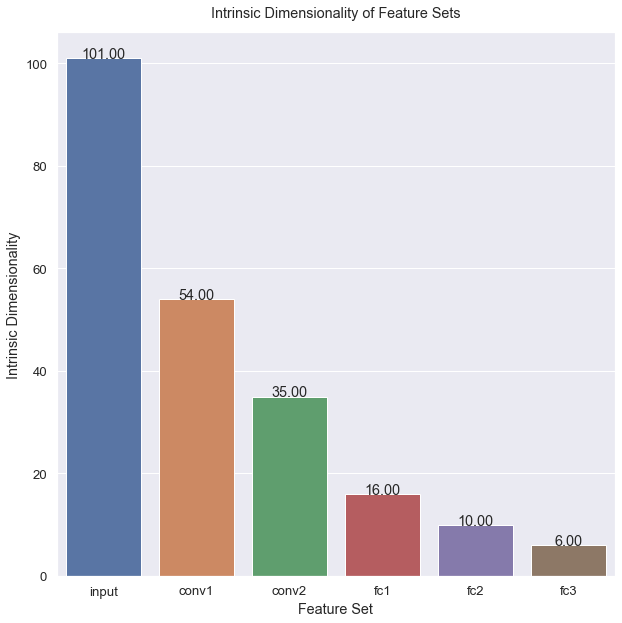

In [27]:
# The following function was brought over from https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
        
ax = sns.barplot(data = intrin_dim, x = "Feature Set", y = "Intrinsic Dimensionality")
show_values_on_bars(ax)
ax.set_title("Intrinsic Dimensionality of Feature Sets", pad = 15);